# Feature Selection
In the feature selection, we will select which features to use for model building as there is currently a still a high number of features in our data. 

**Table of Contents:**
- Features
- Variance
- Correlation

We start by loading the cleaned up dataset into a pandas DataFrame:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import networkx as nx

In [2]:
pd.set_option('display.max_columns', None)

df_origin = pd.read_csv('Android_Malware_clean_eda.csv', low_memory=False)
df = df_origin.copy()

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df['Flow ID'] = df['Flow ID'].astype('category')
df['Label'] = df['Label'].astype('category')
df['Down/Up Ratio'] = pd.to_numeric(df['Down/Up Ratio'], errors='coerce')

In [4]:
df.shape

(353413, 72)

In [5]:
df.tail()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
353408,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,NaT,126711,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,15.783949,1.267110e+05,0.000000e+00,126711.0,126711.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,32,32,7.891975,7.891975,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000,1.0,0.0,1.0,0.0,340.0,1369.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
353409,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,NaT,48012,1,1,30.0,140.0,30.0,30.0,30.000000,0.000000,140.0,140.0,140.000,0.000000,3540.781471,41.656253,4.801200e+04,0.000000e+00,48012.0,48012.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,32,32,20.828126,20.828126,30.0,140.0,66.666667,63.508530,4033.333333,0.0,0.0,0.0,0.0,0.0,1.0,100.000000,30.000000,140.000,1.0,30.0,1.0,140.0,-1.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
353410,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,NaT,20028018,11,8,339.0,6335.0,213.0,0.0,30.818182,71.272461,1460.0,0.0,791.875,720.377369,333.233174,0.948671,1.112668e+06,4.629064e+06,19660490.0,8.0,20028018.0,2002801.8,6.204493e+06,19660490.0,9.0,232606.0,33229.428571,56357.152027,131587.0,8.0,0.0,240,172,0.549231,0.399440,0.0,1460.0,333.700000,584.144187,341224.431579,0.0,0.0,1.0,0.0,0.0,0.0,351.263158,30.818182,791.875,11.0,339.0,8.0,6335.0,65535.0,31.0,2.0,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
353411,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,NaT,347926,1,1,32.0,48.0,32.0,32.0,32.000000,0.000000,48.0,48.0,48.000,0.000000,229.933951,5.748349,3.479260e+05,0.000000e+00,347926.0,347926.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,20,20,2.874174,2.874174,32.0,48.0,37.333333,9.237604,85.333333,0.0,0.0,0.0,0.0,0.0,1.0,56.000000,32.000000,48.000,1.0,32.0,1.0,48.0,-1.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
353412,10.42.0.211-10.42.0.1-9320-53-17,10.42.0.211,9320,10.42.0.1,53.0,17.0,NaT,125473,1,1,30.0,92.0,30.0,30.0,30.000000,0.000000,92.0,92.0,92.000,0.000000,972.320738,15.939684,1.254730e+05,0.000000e+00,125473.0,125473.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,32,32,7.969842,7.969842,30.0,92.0,50.666667,35.795717,1281.333333,0.0,0.0,0.0,0.0,0.0,1.0,76.000000,30.000000,92.000,1.0,30.0,1.0,92.0,-1.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


# Features
Lets take a look at all the features currently in the dataframe:

In [6]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
      

In [7]:
pd.set_option('display.max_rows', None)
df.dtypes

Flow ID                              category
Source IP                              object
Source Port                             int64
Destination IP                         object
Destination Port                      float64
Protocol                              float64
Timestamp                      datetime64[ns]
Flow Duration                           int64
Total Fwd Packets                       int64
Total Backward Packets                  int64
Total Length of Fwd Packets           float64
Total Length of Bwd Packets           float64
Fwd Packet Length Max                 float64
Fwd Packet Length Min                 float64
Fwd Packet Length Mean                float64
Fwd Packet Length Std                 float64
Bwd Packet Length Max                 float64
Bwd Packet Length Min                 float64
Bwd Packet Length Mean                float64
Bwd Packet Length Std                 float64
Flow Bytes/s                          float64
Flow Packets/s                    

## Variance

The code filters out numeric features with low variance (below a specified threshold). Excluding low-variance features can improve model generalization, enhance computational efficiency, simplify models for better interpretability, and aid in exploratory data analysis. 

In [8]:
numdf = df.select_dtypes(include="number")
variance_per_column = numdf.var()

threshold = 0.01

# Identify columns with variance below the threshold
low_variance_columns = variance_per_column[variance_per_column < threshold].index.tolist()
print(low_variance_columns)

[]


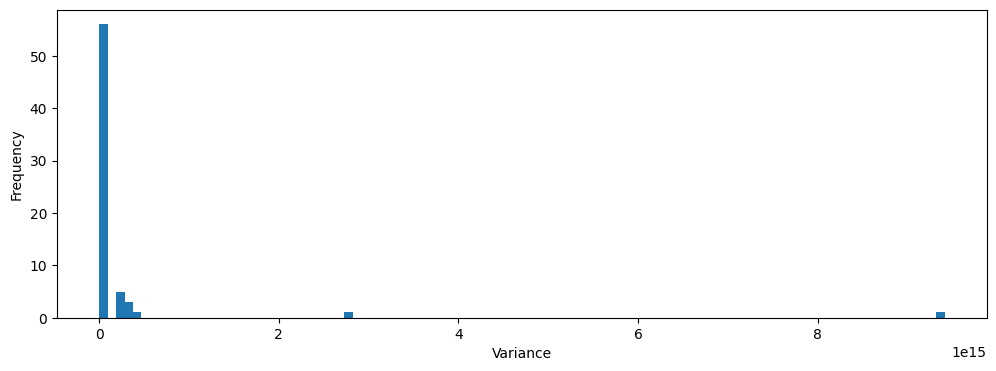

In [9]:
plt.figure(figsize=(12, 4))
plt.hist(variance_per_column, bins=100)
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Print variance per column in text form, sorted by variance
print("Variance per Column (sorted by variance):")
for column, variance in sorted(variance_per_column.items(), key=lambda x: x[1]):
    print(f"{column}: {variance}")

Variance per Column (sorted by variance):
FIN Flag Count: 0.01649227032009951
Fwd PSH Flags: 0.061515803936436964
SYN Flag Count: 0.061515803936436964
URG Flag Count: 0.16321125146593043
PSH Flag Count: 0.22224893970374673
ACK Flag Count: 0.24559966870950617
Down/Up Ratio: 0.4050847948463796
Protocol: 20.5516096910338
act_data_pkt_fwd: 223.60330601292247
Min Packet Length: 456.8668608888768
Fwd Packet Length Min: 3418.6692796511625
Bwd Packet Length Min: 3499.5239885446185
Total Fwd Packets: 4516.434339240065
Subflow Fwd Packets: 4516.434339240065
Fwd Packet Length Mean: 14301.764568912373
Avg Fwd Segment Size: 14301.764568912376
Fwd Packet Length Std: 23895.64108108347
Total Backward Packets: 36967.06008736471
Subflow Bwd Packets: 36967.06008736471
Packet Length Mean: 37760.305361288825
Average Packet Size: 40126.45745270088
Packet Length Std: 50668.46686028966
Bwd Packet Length Std: 52981.55446887849
Bwd Packet Length Mean: 97322.41178460422
Avg Bwd Segment Size: 97322.41178460422
Fw

Flag count features, such as 'FIN Flag Count,' 'Fwd PSH Flags,' 'SYN Flag Count,' 'URG Flag Count,' 'PSH Flag Count,' and 'ACK Flag Count,' are binary features that typically only take values of 0 or 1. Since the variance is calculated based on the squared differences from the mean, binary features with little variability (limited to two values) will tend to have low variance. Therefore it may not be relevant to remove them based on their variance.

The only other feature with low variance is Down/Up Ratio. This column could be relevant to exclude from the model.

In [11]:
df = df.drop('Down/Up Ratio', axis=1)

## Correlation

In [12]:
categorical_columns = ['Source IP', 'Destination IP', 'Label']

# Enumerate and create new columns
for column in categorical_columns:
    df[column + '_ID'] = df[column].astype('category').cat.codes

df_num = df.drop(columns=categorical_columns)
df_num = df_num.drop(columns='Flow ID')
df_num

In [8]:
correlation_matrix = df_num.corr()

C:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


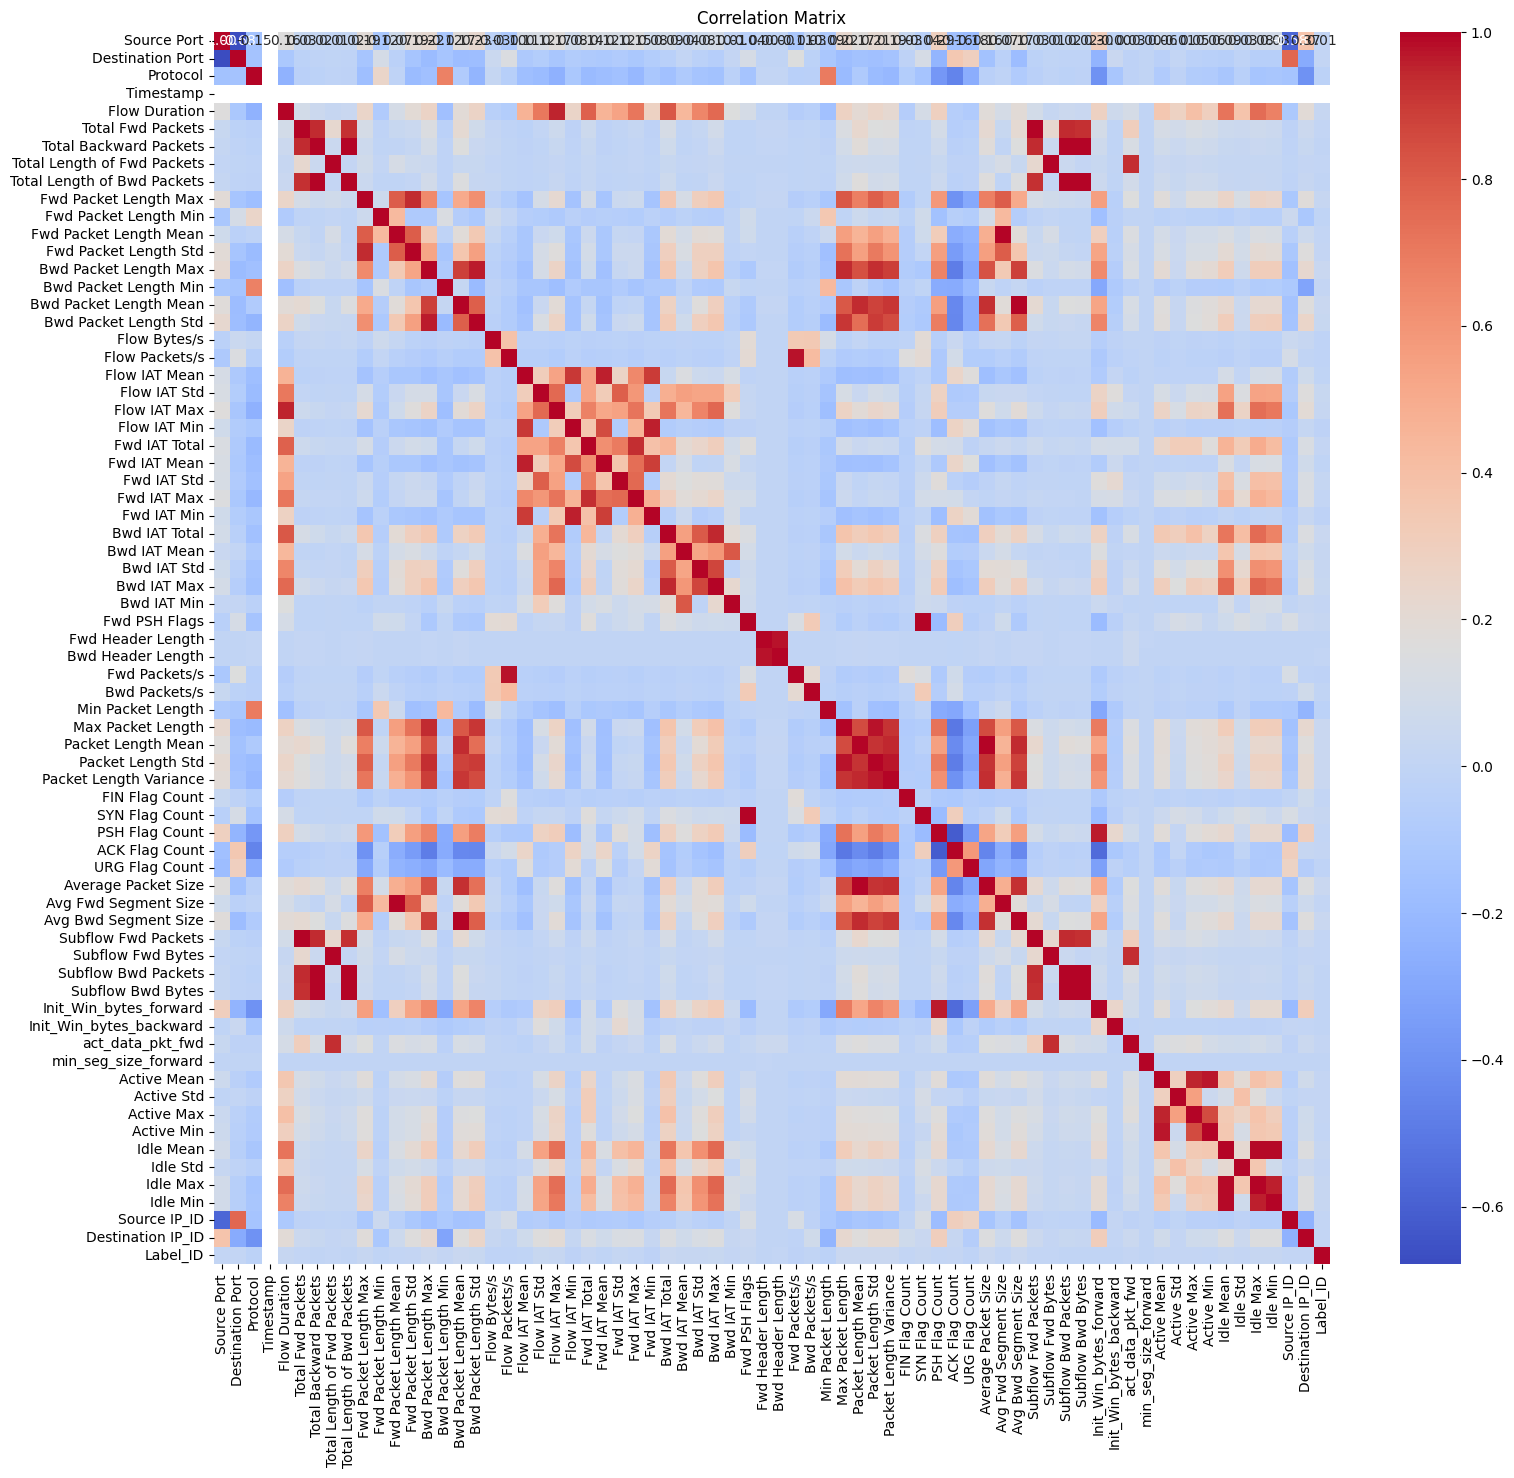

In [9]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
# Identify highly correlated features
threshold = 0.9
highly_correlated_features = set()
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j))

# Print highly correlated features
print("Highly Correlated Features:")
print(highly_correlated_features)

# Print highly correlated feature pairs
print("\n Highly Correlated Feature Pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly Correlated Features:
{'Flow IAT Min', 'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'act_data_pkt_fwd', 'Fwd IAT Max', 'Bwd IAT Max', 'Active Max', 'SYN Flag Count', 'Total Length of Bwd Packets', 'Bwd Packet Length Std', 'Init_Win_bytes_forward', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Idle Max', 'Fwd Packet Length Std', 'Fwd IAT Mean', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Packet Length Mean', 'Fwd Packets/s', 'Bwd Header Length', 'Fwd IAT Min', 'Max Packet Length', 'Idle Min', 'Packet Length Variance', 'Total Backward Packets', 'Flow IAT Max', 'Active Min', 'Packet Length Std', 'Average Packet Size'}

 Highly Correlated Feature Pairs:
('Total Backward Packets', 'Total Fwd Packets')
('Total Length of Bwd Packets', 'Total Fwd Packets')
('Total Length of Bwd Packets', 'Total Backward Packets')
('Fwd Packet Length Std', 'Fwd Packet Length Max')
('Bwd Packet Length Std', 'Bwd Packet Length Max')
('Flow IAT Max', 'Flow Duration')
('Flow IAT Min', 'Flow IAT Mean')
('Fw

In [27]:
G = nx.Graph()
G.add_edges_from(highly_correlated_pairs)

# Find connected components (groups) in the graph
correlation_groups = list(nx.connected_components(G))

# Print the identified groups
print("Highly Correlated Feature Groups:")
for group in correlation_groups:
    print(group)

Highly Correlated Feature Groups:
{'Subflow Fwd Packets', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Subflow Bwd Packets', 'Total Fwd Packets'}
{'Fwd Packet Length Max', 'Fwd Packet Length Std'}
{'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Avg Bwd Segment Size', 'Max Packet Length', 'Packet Length Variance', 'Packet Length Std', 'Bwd Packet Length Mean', 'Average Packet Size', 'Packet Length Mean'}
{'Flow IAT Max', 'Flow Duration'}
{'Flow IAT Min', 'Fwd IAT Min', 'Fwd IAT Mean', 'Flow IAT Mean'}
{'Fwd IAT Total', 'Fwd IAT Max'}
{'Bwd IAT Max', 'Bwd IAT Total'}
{'Fwd Header Length', 'Bwd Header Length'}
{'Fwd Packets/s', 'Flow Packets/s'}
{'SYN Flag Count', 'Fwd PSH Flags'}
{'Avg Fwd Segment Size', 'Fwd Packet Length Mean'}
{'Total Length of Fwd Packets', 'act_data_pkt_fwd', 'Subflow Fwd Bytes'}
{'PSH Flag Count', 'Init_Win_bytes_forward'}
{'Active Mean', 'Active Max', 'Active Min'}
{'Idle Min', 'Idle Max', 'Idle Mean'}


We will keep only one feature from each of the highly correlated groups.

{'Subflow Fwd Packets', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Subflow Bwd Packets', **'Total Fwd Packets'**}
{'Fwd Packet Length Max', 'Fwd Packet Length Std'}


{'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Avg Bwd Segment Size', 'Max Packet Length', 'Packet Length Variance', 'Packet Length Std', 'Bwd Packet Length Mean', **'Average Packet Size'**, 'Packet Length Mean'}


{'Flow IAT Max', **'Flow Duration'**}


{'Flow IAT Min', 'Fwd IAT Min', 'Fwd IAT Mean', **'Flow IAT Mean'**}


{**'Fwd IAT Total'**, 'Fwd IAT Max'}


{'Bwd IAT Max', **'Bwd IAT Total'**}


{**'Fwd Header Length'**, 'Bwd Header Length'}


{'Fwd Packets/s', **'Flow Packets/s'**}


{**'SYN Flag Count'**, 'Fwd PSH Flags'}
There is already another feature called PSH Flags, SYN Flag will therefore be prioritized

{'Avg Fwd Segment Size', **'Fwd Packet Length Mean'**}


{**'Total Length of Fwd Packets'**, 'act_data_pkt_fwd', 'Subflow Fwd Bytes'}


{**'PSH Flag Count'**, 'Init_Win_bytes_forward'}
We know from EDA that Init_Win_bytes_forward contains a lot of meaningless negatives values we will therefore remove this column in favore of keeping PSH flag count.

{**'Active Mean'**, 'Active Max', 'Active Min'}
{'Idle Min', 'Idle Max', **'Idle Mean'**}
We will keep the mean for both Active and Idle


Remove:

{'Subflow Fwd Packets', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Subflow Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Avg Bwd Segment Size', 'Max Packet Length', 'Packet Length Variance', 'Packet Length Std', 'Bwd Packet Length Mean', 'Packet Length Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Min', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Max', 'Bwd Header Length', 'Fwd Packets/s', 'Fwd PSH Flags', 'Avg Fwd Segment Size', 'act_data_pkt_fwd', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Active Max', 'Active Min', 'Idle Min', 'Idle Max', }


Keep:

{'Total Fwd Packets','Average Packet Size','Flow Duration', 'Flow IAT Mean', 'Fwd IAT Total', 'Bwd IAT Total', 'Fwd Header Length', 'Flow Packets/s', 'SYN Flag Count', 'Fwd Packet Length Mean', 'Total Length of Fwd Packets', 'PSH Flag Count','Active Mean', 'Idle Mean'}


##### 

## Drop columns

In [18]:
# List of all columns to drop
columns_to_drop = [
    'Subflow Fwd Packets', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Subflow Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Avg Bwd Segment Size', 
    'Max Packet Length', 'Packet Length Variance', 'Packet Length Std', 'Bwd Packet Length Mean', 'Packet Length Mean', 'Flow IAT Max', 
    'Flow IAT Min', 'Fwd IAT Min', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Max', 'Bwd Header Length', 'Fwd Packets/s', 'Fwd PSH Flags', 
    'Avg Fwd Segment Size', 'act_data_pkt_fwd', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Active Max', 'Active Min', 'Idle Min', 'Idle Max',
]

# Drop the specified columns
df_dropped = df_num.drop(columns=columns_to_drop)
print(df_dropped.columns)
print(df_dropped.shape)

Index(['Source Port', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Total', 'Fwd IAT Std',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min',
       'Fwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Average Packet Size', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Idle Mean',
       'Idle Std', 'Source IP_ID', 'Destination IP_ID', 'Label_ID'],
      dtype='object')
(353413, 38)


In [19]:
# List of all columns to drop
columns_to_drop = [
    'Fwd Packet Length Min',
    'Flow IAT Mean', 'Fwd IAT Total', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Min',
    'Active Std', 'Idle Std',
    'Init_Win_bytes_backward', 'Timestamp'
]

# Drop the specified columns
df_dropped = df_dropped.drop(columns=columns_to_drop)
print(df_dropped.columns)
print(df_dropped.shape)

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Mean', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Std', 'Fwd IAT Std', 'Bwd IAT Std',
       'Fwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Average Packet Size', 'min_seg_size_forward',
       'Active Mean', 'Idle Mean', 'Source IP_ID', 'Destination IP_ID',
       'Label_ID'],
      dtype='object')
(353413, 28)


In [20]:
df_dropped.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Fwd IAT Std,Bwd IAT Std,Fwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,min_seg_size_forward,Active Mean,Idle Mean,Source IP_ID,Destination IP_ID,Label_ID
count,353413.00000,353413.000000,353413.000000,3.534130e+05,353413.000000,3.534130e+05,353413.000000,353413.000000,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,3.534130e+05,353413.000000,353413.000000,353413.000000,353413.000000,353413.000000,353413.00000,353413.000000,353413.000000,3.534130e+05,3.534130e+05,3.534130e+05,353413.000000,353413.000000,353413.000000
mean,39379.43332,5230.789176,8.385767,1.042437e+07,7.370023,6.831059e+02,60.012655,23.193468,8.451026e+04,5.533004e+03,2.384973e+06,1.889201e+06,1.416121e+06,1.941779e+05,819.794675,8.462909,0.016774,0.065852,0.333412,0.43366,0.205400,128.199455,5.095364e+02,1.626661e+05,3.800080e+06,104.857524,1202.744675,1.047412
std,17654.35443,14389.331762,4.533388,2.081634e+07,67.204422,1.947917e+04,119.589985,59.156775,9.140993e+05,3.910738e+04,6.130671e+06,6.033667e+06,5.242454e+06,5.265267e+07,8616.875553,21.374444,0.128422,0.248024,0.471433,0.49558,0.403994,200.315894,2.868443e+05,8.818258e+05,1.411974e+07,364.805979,1280.399372,1.004218
min,68.00000,25.000000,6.000000,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.667342e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,34700.00000,80.000000,6.000000,4.870900e+04,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,6.556188e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,8.000000,12.000000,0.000000
50%,43314.00000,443.000000,6.000000,5.516420e+05,2.000000,3.100000e+01,29.000000,0.000000,9.625733e+01,7.845876e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,0.936664,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,51.428571,3.200000e+01,0.000000e+00,0.000000e+00,9.000000,834.000000,1.000000
75%,52321.00000,443.000000,6.000000,1.059120e+07,5.000000,4.410000e+02,55.000000,0.000000,2.418646e+03,6.338943e+01,1.450800e+06,1.761819e+05,4.529426e+04,1.360000e+02,17.322616,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,157.500000,3.200000e+01,0.000000e+00,0.000000e+00,9.000000,1927.000000,2.000000
max,65531.00000,65428.000000,17.000000,1.199999e+08,17877.000000,9.043781e+06,1460.000000,1460.000000,1.705000e+08,2.000000e+06,8.447404e+07,8.478313e+07,8.467014e+07,1.858721e+10,500000.000000,1208.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1812.000000,1.705248e+08,9.718488e+07,1.199514e+08,2529.000000,4731.000000,3.000000


In [21]:
df_dropped.to_csv('Android_Malware_featureselected.csv', index=False)

In [22]:
df_num.to_csv('Android_Malware_num_nonfeatureselected.csv', index=False)